In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [61]:
np.exp(2)

np.float64(7.38905609893065)

MIF file '4_wave_memory.mif' generated successfully.


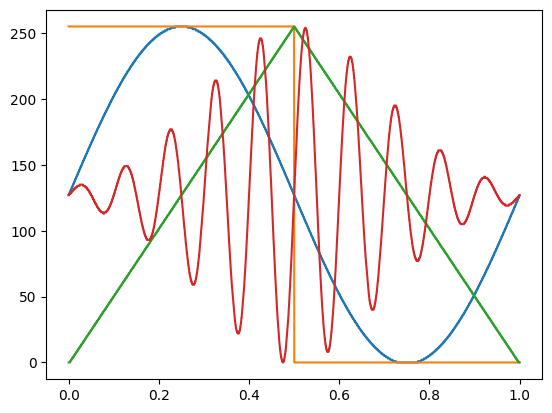

In [79]:
import random

def generate_data(address, data_type, data_width):
    if data_type == 'linear':
        return address % (2 ** data_width)
    elif data_type == 'random':
        return random.randint(0, (2 ** data_width) - 1)
    elif data_type == 'all_zero':
        return 0
    elif data_type == 'all_one':
        return (2 ** data_width) - 1
    else:
        raise ValueError(f"Unknown data_type: {data_type}")

def format_address(addr, radix, digits):
    if radix == "HEX":
        return format(addr, f'0{digits}X')
    elif radix == "BIN":
        return format(addr, f'0{digits}b')
    elif radix == "DEC":
        return format(addr, f'0{digits}d')
    elif radix == "OCT":
        return format(addr, f'0{digits}o')
    else:
        raise ValueError(f"Invalid radix: {radix}")

def format_data(number, data_radix, data_width):
    max_value = (2 ** data_width) - 1
    if number > max_value:
        raise ValueError("Data value exceeds maximum for given data_width")
    if data_radix == "HEX":
        hex_digits = (data_width + 3) // 4
        return format(number, f'0{hex_digits}X')
    elif data_radix == "BIN":
        return format(number, f'0{data_width}b')
    elif data_radix == "DEC":
        return str(number)
    elif data_radix == "OCT":
        oct_digits = (data_width + 2) // 3
        return format(number, f'0{oct_digits}o')
    else:
        raise ValueError(f"Invalid data_radix: {data_radix}")

# Configuration parameters
filename = "4_wave_memory.mif"
data_width = 8
memory_depth = 4096*4
address_radix = "DEC"
data_radix = "DEC"
data_type = "sine"  # Options: 'linear', 'random', 'all_zero', 'all_one'

# signal parameters
Freq1 = 1   # frequency of the signal
Fs = 2**12  # sampling frequency
Pha1 = 0    # initial phase of the signal
N = 2**12   # number of samples
t = np.arange(0,(N)/Fs,1/Fs)  # sampling time points
ADC = 2**7 -1   # DC offset of the signal
Amp = 2**7  # amplitude of the signal

######################################################################
sine_wave = Amp*np.sin(2*np.pi*t + Pha1*np.pi/180) + ADC
sine_wave[sine_wave < 0] = 0
sine_wave = np.rint(sine_wave)
sine_wave = sine_wave.astype(int)

plt.plot(t, sine_wave)
############################################################################
square_wave = Amp*signal.square(2*np.pi*t + Pha1*np.pi/180) + ADC
square_wave[square_wave < 0] = 0
square_wave = np.rint(square_wave)
square_wave = square_wave.astype(int)

plt.plot(t, square_wave)
########################################################################
triang_wave = Amp*signal.sawtooth(2*np.pi*t + Pha1*np.pi/180, width=0.5) + ADC
triang_wave[triang_wave < 0] = 0
triang_wave = np.rint(triang_wave)
triang_wave = triang_wave.astype(int)

plt.plot(t, triang_wave)
########################################################################
# sawtooth_wave = Amp*signal.sawtooth(2*np.pi*t + Pha1*np.pi/180, width=1) + ADC
# sawtooth_wave[sawtooth_wave < 0] = 0
# sawtooth_wave = np.rint(sawtooth_wave)
# sawtooth_wave = sawtooth_wave.astype(int)

# plt.plot(t, sawtooth_wave)
#############################################################################
sigma = 0.2
mu = 0.5
gaussian_wave = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(t-mu)**2/(2*sigma**2))*(0.5*Amp*np.sin(2*np.pi*10*t + Pha1*np.pi/180) )+ ADC
gaussian_wave[gaussian_wave < 0] = 0
gaussian_wave = np.rint(gaussian_wave)
gaussian_wave = gaussian_wave.astype(int)

plt.plot(t, gaussian_wave)






# Calculate address formatting
max_address = memory_depth - 1
if address_radix == "HEX":
    address_str = hex(max_address)[2:]
elif address_radix == "BIN":
    address_str = bin(max_address)[2:]
elif address_radix == "DEC":
    address_str = str(max_address)
elif address_radix == "OCT":
    address_str = oct(max_address)[2:]
else:
    raise ValueError(f"Invalid address_radix: {address_radix}")
address_digits = len(address_str)

# Generate data values
# data_values = [generate_data(addr, data_type, data_width) for addr in range(memory_depth)]
data_values = square_wave

# Write MIF file
with open(filename, 'w') as f:
    f.write(f"DEPTH = {memory_depth};\n")
    f.write(f"WIDTH = {data_width};\n")
    f.write(f"ADDRESS_RADIX = {address_radix.upper()};\n")
    f.write(f"DATA_RADIX = {data_radix.upper()};\n")
    f.write("CONTENT\nBEGIN\n")
    
    for addr in range(N):
        fmt_addr = format_address(addr, address_radix, address_digits)
        fmt_data = format_data(sine_wave[addr], data_radix, data_width)
        f.write(f"{fmt_addr} : {fmt_data};\n")

    for addr in range(N, 2*N):
        fmt_addr = format_address(addr , address_radix, address_digits)
        fmt_data = format_data(square_wave[addr - N], data_radix, data_width)
        f.write(f"{fmt_addr} : {fmt_data};\n")

    for addr in range(2*N, 3*N):
        fmt_addr = format_address(addr , address_radix, address_digits)
        fmt_data = format_data(triang_wave[addr - 2*N], data_radix, data_width)
        f.write(f"{fmt_addr} : {fmt_data};\n")

    for addr in range(3*N, memory_depth):
        fmt_addr = format_address(addr  , address_radix, address_digits)
        fmt_data = format_data(gaussian_wave[addr - 3*N], data_radix, data_width)
        f.write(f"{fmt_addr} : {fmt_data};\n")
    
    f.write("END;\n")

print(f"MIF file '{filename}' generated successfully.")

In [84]:
2**32*50e3/50e6

4294967.296